In [1]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

In [2]:
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Platt Scaling (Sigmoid Calibration)**

In [3]:
# Train uncalibrated SVM
svm = SVC(probability=True, random_state=42)
svm.fit(x_train, y_train)


# Calibrate using Platt scaling
svm_calibrated = CalibratedClassifierCV(svm, method='sigmoid', cv=3)
svm_calibrated.fit(x_train, y_train)

,estimator,SVC(probabili...ndom_state=42)
,method,'sigmoid'
,cv,3
,n_jobs,None
,ensemble,'auto'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True


In [4]:
svm_proba = svm.predict_proba(x_test)[:, 1]
svm_calibrated_proba = svm_calibrated.predict_proba(x_test)[:, 1]

# Compare Brier scores
print("Brier Score (lower is better):")
print(f"Uncalibrated SVM: {brier_score_loss(y_test, svm_proba):.4f}")
print(f"Calibrated SVM (Platt): {brier_score_loss(y_test, svm_calibrated_proba):.4f}")

Brier Score (lower is better):
Uncalibrated SVM: 0.1080
Calibrated SVM (Platt): 0.1083


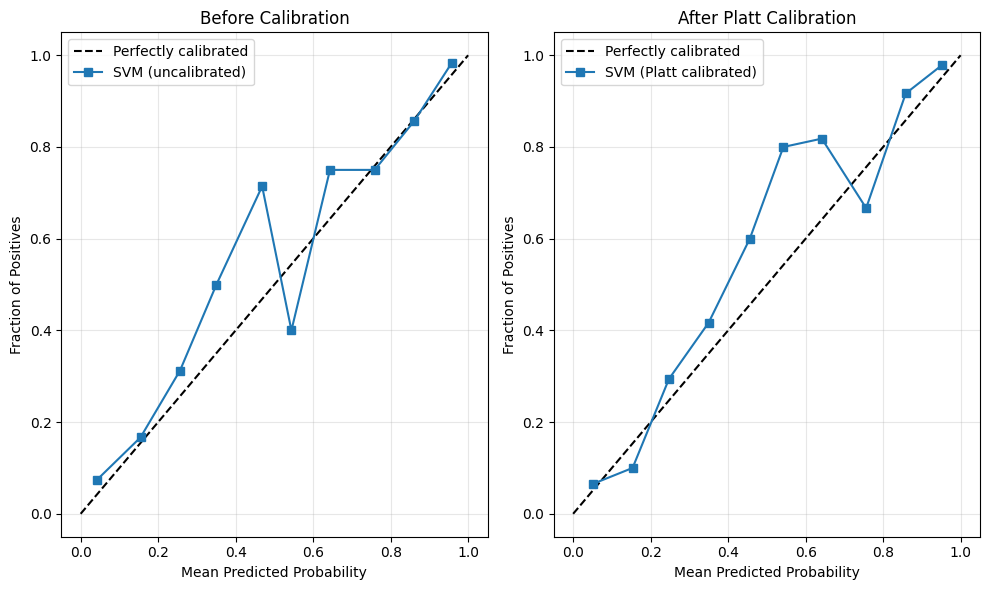

In [5]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, svm_proba, n_bins=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
ax1.plot(mean_predicted_value, fraction_of_positives, 's-', label='SVM (uncalibrated)')
ax1.set_xlabel('Mean Predicted Probability')
ax1.set_ylabel('Fraction of Positives')
ax1.set_title('Before Calibration')
ax1.legend()
ax1.grid(True, alpha=0.3)


fraction_of_positives_calibrated, mean_predicted_value_calibrated = calibration_curve(
    y_test, svm_calibrated_proba, n_bins=10
)
ax2.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
ax2.plot(mean_predicted_value_calibrated, fraction_of_positives_calibrated, 's-', label='SVM (Platt calibrated)')
ax2.set_xlabel('Mean Predicted Probability')
ax2.set_ylabel('Fraction of Positives')
ax2.set_title('After Platt Calibration')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Isotonic Regression**

In [ ]:
svm_calibrated_isotonic = CalibratedClassifierCV(svm, method='isotonic', cv=3)
svm_calibrated_isotonic.fit(x_train, y_train)

svm_calibrated_isotonic_proba = svm_calibrated_isotonic.predict_proba(x_test)[:, 1]

print("Brier Score Comparison:")
print(f"Uncalibrated SVM: {brier_score_loss(y_test, svm_proba):.4f}")
print(f"Platt Scaling: {brier_score_loss(y_test, svm_calibrated_proba):.4f}")
print(f"Isotonic Regression: {brier_score_loss(y_test, svm_calibrated_isotonic_proba):.4f}")

Brier Score Comparison:
  Uncalibrated SVM: 0.1080
  Platt Scaling: 0.1083
  Isotonic Regression: 0.1083


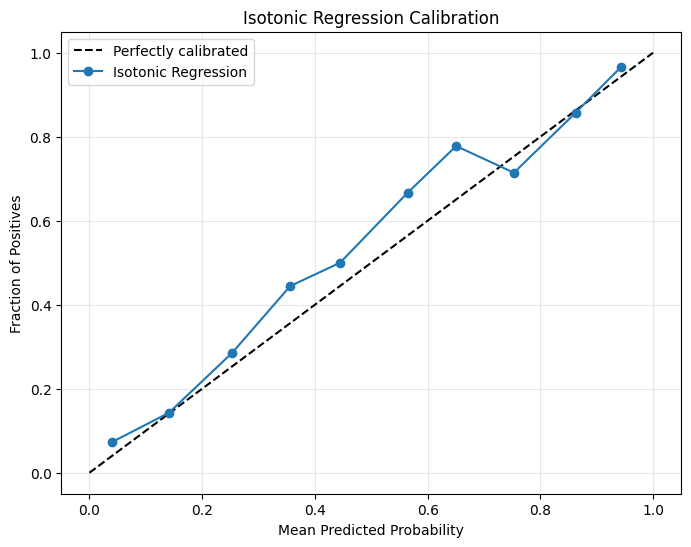

In [7]:
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, svm_calibrated_isotonic_proba, n_bins=10
)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.plot(mean_predicted_value, fraction_of_positives, 'o-', label='Isotonic Regression')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Isotonic Regression Calibration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()